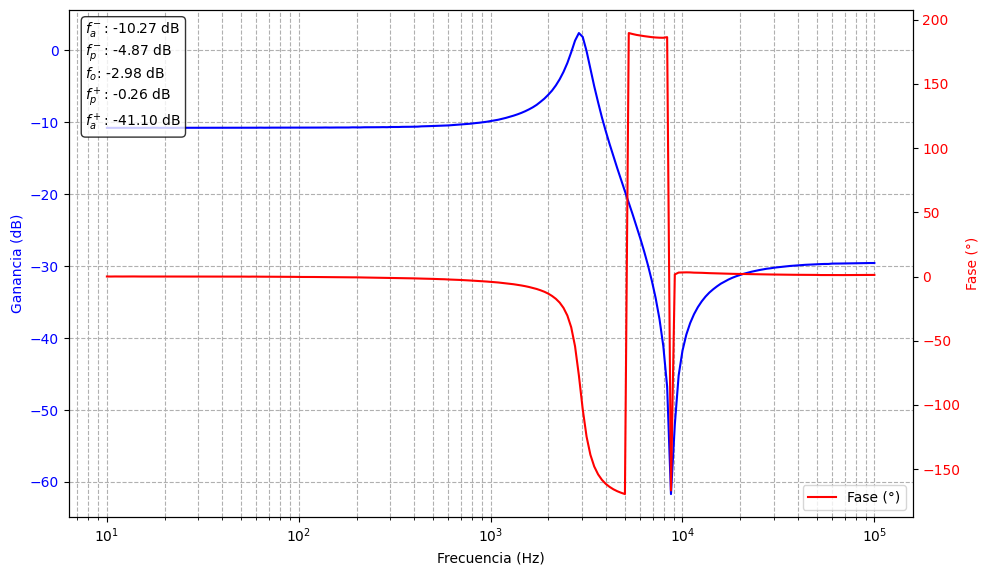

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/lp_cumple1.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]
fase = df[df.columns[-1]]  # Última columna

# Frecuencias clave (Hz)
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Extraer ganancias en esas frecuencias (buscando la más cercana)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia[idx]

# Crear figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia
ax1.semilogx(frecuencia, ganancia, 'b', label='Ganancia (dB)')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Fase
ax2 = ax1.twinx()
ax2.semilogx(frecuencia, fase, 'r', label='Fase (°)')
ax2.set_ylabel('Fase (°)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Leyenda personalizada multilínea para Ganancia
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
legend_ganancia = ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyenda para fase
ax2.legend(loc='lower right')

# Título y grid
fig.suptitle('')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()



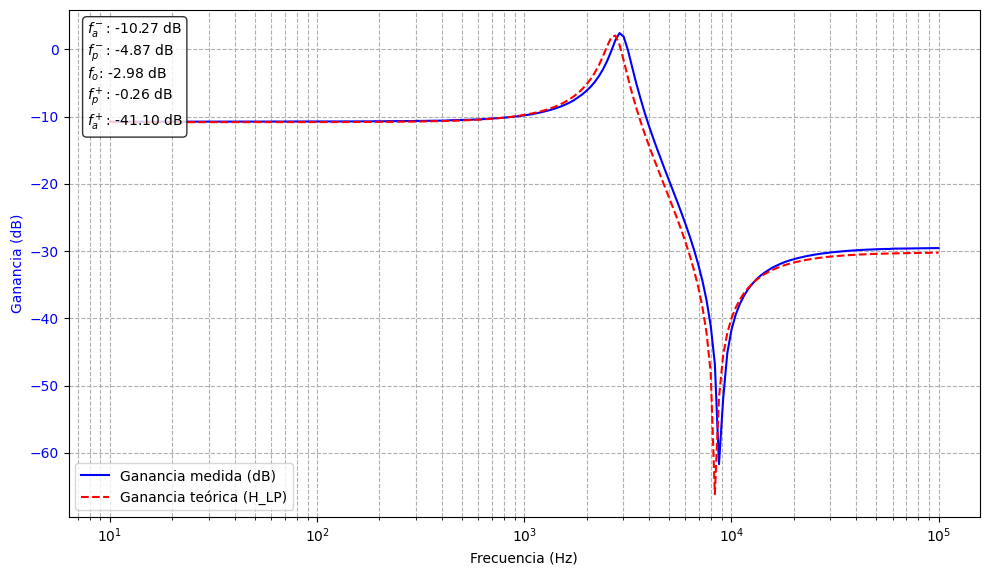

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/lp_cumple1.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos desde archivo
frecuencia = df["Frequency (Hz)"]
ganancia_medida = df["Gain (dB)"]
fase_medida = df[df.columns[-1]]  # Última columna

# Constantes
twopi = 2 * np.pi
w = twopi * frecuencia  # ω = 2πf

# --- Función de transferencia teórica: H_LP ---
H_LP_complex = 0.0309265339034133 * (
    ((w)**2 - 2770180113.50676)
    / (-(w)**2 + 3492.17357916022j * w + 298432190.883823)
)
ganancia_H_LP_dB = 20 * np.log10(np.abs(H_LP_complex))
fase_H_LP = np.angle(H_LP_complex, deg=True)

# --- Frecuencias clave (Hz) ---
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Ganancias en frecuencias clave (usando datos medidos)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia_medida[idx]

# --- Gráfico ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia medida
ax1.semilogx(frecuencia, ganancia_medida, 'b', label='Ganancia medida (dB)')
# Ganancia teórica H_LP
ax1.semilogx(frecuencia, ganancia_H_LP_dB, 'r--', label='Ganancia teórica (H_LP)')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Leyenda personalizada de ganancias en frecuencias clave
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyenda de líneas
ax1.legend(loc='lower left')

# Título y grilla
fig.suptitle('')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()


Funcion High-Pass-Notch

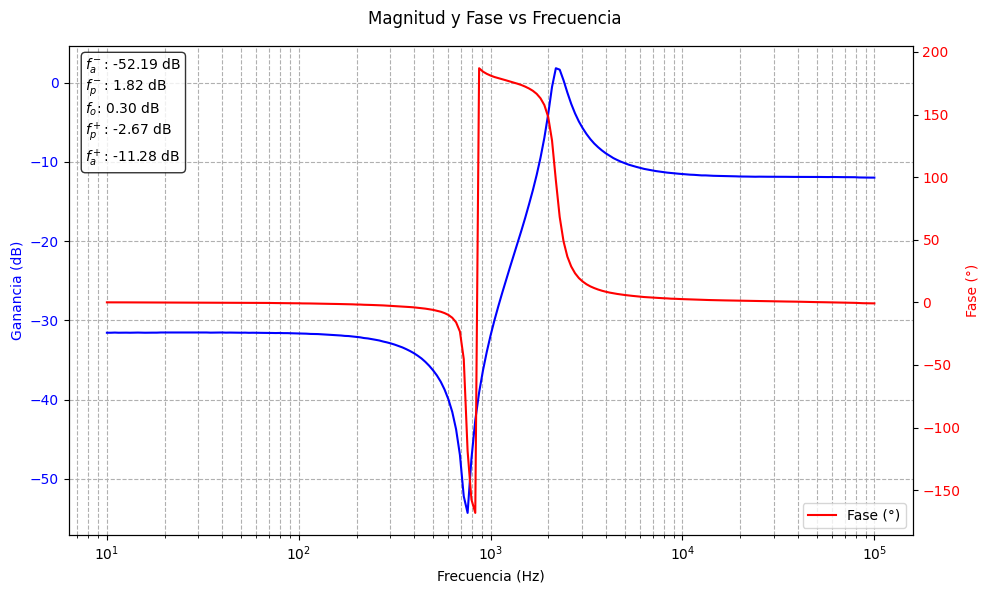

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/hp_cumple1.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]
fase = df[df.columns[-1]]  # Última columna

# Frecuencias clave (Hz)
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Extraer ganancias en esas frecuencias (buscando la más cercana)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia[idx]

# Crear figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia
ax1.semilogx(frecuencia, ganancia, 'b', label='Ganancia (dB)')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Fase
ax2 = ax1.twinx()
ax2.semilogx(frecuencia, fase, 'r', label='Fase (°)')
ax2.set_ylabel('Fase (°)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Leyenda personalizada multilínea para Ganancia
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
legend_ganancia = ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyenda para fase
ax2.legend(loc='lower right')

# Título y grid
fig.suptitle('Magnitud y Fase vs Frecuencia')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:\Users\samma\Documents\ITBA\TC2\TP4\Imagenes\bpampli6dbsinzoom2.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]
fase = df[df.columns[-1]]  # Última columna

# Frecuencias clave (Hz)
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Extraer ganancias en esas frecuencias (buscando la más cercana)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia[idx]

# --- Evaluar H_HP ---
w = 2 * np.pi * frecuencia  # convertir Hz a rad/s

# Definir la función de transferencia H_HP
H_HP = 0.248797558352433 * np.abs(
    ((w)**2 - 18683885.74981) /
    (-(w)**2 + 2709.43848968119j * w + 179451343.044671)
)

# Fase de H_HP
H_HP_complex = 0.248797558352433 * (
    ((w)**2 - 18683885.74981) /
    (-(w)**2 + 2709.43848968119j * w + 179451343.044671)
)
fase_H_HP = np.angle(H_HP_complex, deg=True)

# Ganancia en dB
ganancia_H_HP_dB = 20 * np.log10(H_HP)

# --- Gráfico ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia medida
ax1.semilogx(frecuencia, ganancia, 'b', label='Ganancia medida (dB)')
# Ganancia teórica
#ax1.semilogx(frecuencia, ganancia_H_HP_dB, 'r--', label='Ganancia teórica (H_HP)')
#ax1.set_xlabel('Frecuencia (Hz)')
#ax1.set_ylabel('Ganancia (dB)', color='red')
#ax1.tick_params(axis='y', labelcolor='red')

# Fase medida
x2 = ax1.twinx()
x2.semilogx(frecuencia, fase, 'r', label='Fase medida (°)')
# Fase teórica
#x2.semilogx(frecuencia, fase_H_HP, 'r--', label='Fase teórica (H_HP)')
#x2.set_ylabel('Fase (°)', color='r')
#x2.tick_params(axis='y', labelcolor='r')
#
# Leyenda personalizada multilínea para Ganancia
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyendas automáticas para líneas
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Título y grid
fig.suptitle('')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()


Band-Pass-Notch

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/bpcumple22_05.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]
fase = df[df.columns[-1]]  # Última columna

# Frecuencias clave (Hz)
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Extraer ganancias en esas frecuencias (buscando la más cercana)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia[idx]

# Crear figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia
ax1.semilogx(frecuencia, ganancia, 'b', label='Ganancia (dB)')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Fase
ax2 = ax1.twinx()
ax2.semilogx(frecuencia, fase, 'r', label='Fase (°)')
ax2.set_ylabel('Fase (°)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Leyenda personalizada multilínea para Ganancia
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
legend_ganancia = ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyenda para fase
ax2.legend(loc='lower right')

# Título y grid
fig.suptitle('')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()

In [22]:
%matplotlib qt

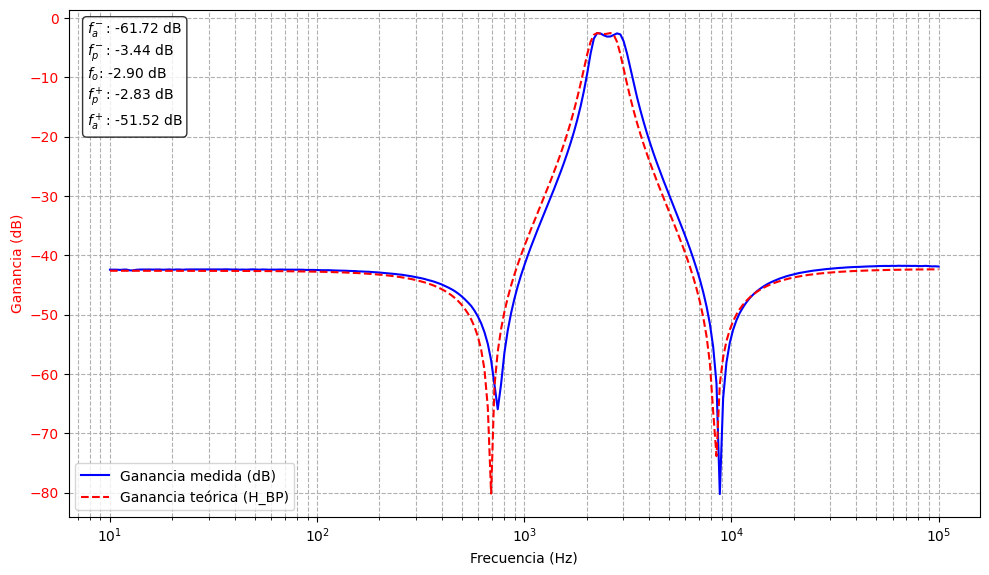

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/bpcumple22_05.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]
fase = df[df.columns[-1]]  # Última columna

# Frecuencias clave (Hz)
frecuencias_clave = {
    r"$f_a^-$": 727.272,
    r"$f_p^-$": 2160,
    r"$f_o$": 2400,
    r"$f_p^+$": 2667,
    r"$f_a^+$": 7920
}

# Extraer ganancias en esas frecuencias (buscando la más cercana)
ganancias_clave = {}
for etiqueta, f_target in frecuencias_clave.items():
    idx = (np.abs(frecuencia - f_target)).idxmin()
    ganancias_clave[etiqueta] = ganancia[idx]

# --- Evaluar H_BP ---
w = 2 * np.pi * frecuencia  # convertir Hz a rad/s

# Definir la función de transferencia H_BP
numerador = ((w)**2 - 2770180113.50676) * ((w)**2 - 18683885.74981)
denominador = (
    (-(w)**2 + 2709.43848968119j * w + 179451343.044671) *
    (-(w)**2 + 3492.17357916022j * w + 298432190.883823)
)
H_BP_complex = 0.00769444612347297 * (numerador / denominador)

# Módulo y fase
H_BP_abs = np.abs(H_BP_complex)
fase_H_BP = np.angle(H_BP_complex, deg=True)

# Ganancia en dB
ganancia_H_BP_dB = 20 * np.log10(H_BP_abs)

# --- Gráfico ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ganancia medida
ax1.semilogx(frecuencia, ganancia, 'b', label='Ganancia medida (dB)')
# Ganancia teórica
ax1.semilogx(frecuencia, ganancia_H_BP_dB, 'r--', label='Ganancia teórica (H_BP)')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Fase medida
#ax2 = ax1.twinx()
#ax2.semilogx(frecuencia, fase, 'gray', label='Fase medida (°)')
## Fase teórica
#ax2.semilogx(frecuencia, fase_H_BP, 'orange', label='Fase teórica (H_BP)')
#ax2.set_ylabel('Fase (°)', color='gray')
#ax2.tick_params(axis='y', labelcolor='gray')

# Leyenda personalizada multilínea para Ganancia
texto_leyenda = '\n'.join([f'{k}: {v:.2f} dB' for k, v in ganancias_clave.items()])
ax1.text(
    0.02, 0.98, texto_leyenda, transform=ax1.transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8)
)

# Leyendas automáticas para líneas
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Título y grid
fig.suptitle('')
ax1.grid(True, which="both", ls="--")
fig.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Cargar archivo
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pendrive/bpcumple22_05.csv"
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Limpiar nombres de columnas
df.columns = [col.strip().replace('�', '°') for col in df.columns]

# Extraer datos
frecuencia = df["Frequency (Hz)"]
ganancia = df["Gain (dB)"]

# Frecuencias clave
fa_m = 727.272
fp_m = 2160
fo   = 2400
fp_p = 2667
fa_p = 7920

# --- 1. Ganancia máxima fuera de banda ---
ganancia_fa_menor = ganancia[frecuencia < fa_m]
ganancia_fa_mayor = ganancia[frecuencia > fa_p]

ganancia_max_menor = ganancia_fa_menor.max()
ganancia_max_mayor = ganancia_fa_mayor.max()

# --- 2. Mayor diferencia entre fp- y fp+ ---
# Buscar índices más cercanos
idx_fp_m = (np.abs(frecuencia - fp_m)).idxmin()
idx_fp_p = (np.abs(frecuencia - fp_p)).idxmin()

ganancia_fp_m = ganancia[idx_fp_m]
ganancia_fp_p = ganancia[idx_fp_p]
diferencia_picos = np.abs(ganancia_fp_p - ganancia_fp_m)

# --- 3. Diferencia entre mínimo en banda y máximos fuera de banda ---
# Mínimo entre fp- y fp+
in_band = (frecuencia >= fp_m) & (frecuencia <= fp_p)
ganancia_min_in_band = ganancia[in_band].min()

# Diferencias con máximos fuera de banda
diferencia_min_vs_menor = ganancia_max_menor - ganancia_min_in_band
diferencia_min_vs_mayor = ganancia_max_mayor - ganancia_min_in_band

# Mostrar resultados
print("Ganancia máxima para f < fa^-:", ganancia_max_menor, "dB")
print("Ganancia máxima para f > fa^+:", ganancia_max_mayor, "dB")
print("Diferencia entre fp^+ y fp^-:", diferencia_picos, "dB")
print("Mínimo entre fp^- y fp^+:", ganancia_min_in_band, "dB")
print("Diferencia entre mínimo en banda y máximo f < fa^-:", diferencia_min_vs_menor, "dB")
print("Diferencia entre mínimo en banda y máximo f > fa^+:", diferencia_min_vs_mayor, "dB")


Ganancia máxima para f < fa^-: -42.33 dB
Ganancia máxima para f > fa^+: -41.73 dB
Diferencia entre fp^+ y fp^-: 0.6099999999999999 dB
Mínimo entre fp^- y fp^+: -3.44 dB
Diferencia entre mínimo en banda y máximo f < fa^-: -38.89 dB
Diferencia entre mínimo en banda y máximo f > fa^+: -38.29 dB


Calculo de SNR

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo CSV
ruta_csv = r"C:/Users/samma/Documents/ITBA/TC2/TP4/Pedrive2/rama_ruido_2vpp.csv"

# Leer el CSV omitiendo las primeras dos filas (etiquetas de unidades)
df = pd.read_csv(ruta_csv, skiprows=2, names=["Frecuencia_Hz", "Amplitud_dBV"])

# Convertir las frecuencias a valores numéricos
df["Frecuencia_Hz"] = df["Frecuencia_Hz"].astype(float)


# Encontrar la amplitud en 2.4 kHz (frecuencia de la señal)
f_signal = 2400  # Hz
# Buscar la fila con frecuencia más cercana a 2.4kHz
idx_signal = (df["Frecuencia_Hz"] - f_signal).abs().idxmin()
amplitud_signal_dBV = df.loc[idx_signal, "Amplitud_dBV"]

# Calcular el ruido: excluir ±100 Hz alrededor de 2.4 kHz para evitar interferencia de la señal
banda_exclusion = 100  # Hz
ruido_df = df[(df["Frecuencia_Hz"] < f_signal - banda_exclusion) | 
              (df["Frecuencia_Hz"] > f_signal + banda_exclusion)]

# Calcular la potencia promedio del ruido en dBV (usando promedio logarítmico)
# Convertimos de dBV a V (lineal), sacamos el RMS promedio, y lo convertimos a dBV
ruido_Vrms = 10 ** (ruido_df["Amplitud_dBV"] / 20)
ruido_rms_promedio = np.sqrt(np.mean(ruido_Vrms**2))
ruido_prom_dBV = 20 * np.log10(ruido_rms_promedio)

# Calcular SNR
snr_dB = amplitud_signal_dBV - ruido_prom_dBV

print(f"Amplitud señal en 2.4kHz: {amplitud_signal_dBV:.2f} dBV")
print(f"Nivel promedio de ruido: {ruido_prom_dBV:.2f} dBV")
print(f"**SNR: {snr_dB:.2f} dB**")

# Opcional: Graficar
plt.figure(figsize=(10,5))
plt.plot(df["Frecuencia_Hz"], df["Amplitud_dBV"], label="FFT (dBV)")
plt.axvline(f_signal, color="r", linestyle="--", label="Frecuencia señal (2.4kHz)")
plt.title("")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dBV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Amplitud señal en 2.4kHz: 1.07 dBV
Nivel promedio de ruido: -68.19 dBV
**SNR: 69.26 dB**
